In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
train=pd.read_excel('C:/Users/a5fwpzz/Desktop/training.xlsx')

In [14]:
test=pd.read_excel('C:/Users/a5fwpzz/Desktop/testing.xlsx')

In [15]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [17]:
train.shape,test.shape

((10683, 11), (2671, 10))

In [18]:
# we need to merge data first

df=pd.concat([train,test],sort=False)
print(train.shape,test.shape,df.shape)

(10683, 11) (2671, 10) (13354, 11)


In [19]:
#to select categorical features
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [20]:
#to select numerical features

numerical_features=df.select_dtypes(include=[np.number])
numerical_features.head()

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0


In [21]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [22]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [23]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [24]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [25]:
df['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → UDR → DEL → HYD             1
BOM → DED → DEL → HYD             1
BLR → HBX → BOM → NAG → DEL       1
CCU → RPR → HYD → BLR             1
BOM → JLR → HYD                   1
Name: Route, Length: 132, dtype: int64

In [26]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [28]:
df["Duration"].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
29h 30m      1
40h 40m      1
22h 50m      1
28h 30m      1
20h 30m      1
Name: Duration, Length: 374, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [30]:
print(df['Date_of_Journey'].head())

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object


In [31]:
#df['Date_of_Jouirney']=df['Date_of_Journey'].str.replace('/','').astype(int)

In [32]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]

In [33]:
df['Month']=df['Date_of_Journey'].str.split('/').str[1]

In [34]:
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [35]:
# now will drop date of journey column
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [36]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [37]:
# sepeartaing dep time into hours and min

df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)

In [38]:
# dropping Dep time column
df.drop(['Dep_Time'],axis=1,inplace=True)


In [39]:
# splitting route columns

df['Route_1']=df['Route'].str.split('→').str[0]
df['Route_2']=df['Route'].str.split('→').str[1]
df['Route_3']=df['Route'].str.split('→').str[2]
df['Route_4']=df['Route'].str.split('→').str[3]
df['Route_5']=df['Route'].str.split('→').str[4]


In [40]:
# treating NaN with None

df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)





In [41]:
# dropping route column
df.drop(['Route'],axis=1,inplace=True)


In [42]:
# Arrival_Time

df['Arrival_Hour']=pd.to_datetime(df.Arrival_Time).dt.hour

In [43]:
df['Arrival_Minute']=pd.to_datetime(df.Arrival_Time).dt.minute

In [44]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [45]:
# in additional info column

df["Additional_Info"]=df["Additional_Info"].replace({'No Info':'No Info'})

In [46]:
# convert duration hoursin minute

df['Duration']=df['Duration'].str.replace("h",'*60').str.replace(" ",'+').str.replace("m",'*1').apply(eval)

In [47]:
df["Total_Stops"]=df["Total_Stops"].replace({'non-stop':'0 stop'})

In [48]:
# convert total stops

df['Total_Stops'].replace(['1 stop', '0 stop', '2 stops', '3 stops', '4 stops'], [1,0,2,3,4],inplace=True)

In [49]:
# additional info

df['Additional_Info'].replace({'Change airports':'Other','Business class':'Other','1 Short layover':'Other','Red-eye flight':'Other','2 Long layover':'Other'},inplace=True)

In [50]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,03,2019,22,20,BLR,DEL,None,None,None,1,10
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,05,2019,5,50,CCU,IXR,BBI,BLR,None,13,15
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,06,2019,9,25,DEL,LKO,BOM,COK,None,4,25
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,05,2019,18,5,CCU,NAG,BLR,None,None,23,30
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,01,03,2019,16,50,BLR,NAG,DEL,None,None,21,35


In [51]:
# converting categorical values into numeric


from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df['Airline']=LE.fit_transform(df['Airline'])
df['Source']=LE.fit_transform(df['Source'])
df['Destination']=LE.fit_transform(df['Destination'])

df['Additional_Info']=LE.fit_transform(df['Additional_Info'])
df['Route_1']=LE.fit_transform(df['Route_1'])
df['Route_2']=LE.fit_transform(df['Route_2'])
df['Route_3']=LE.fit_transform(df['Route_3'])
df['Route_4']=LE.fit_transform(df['Route_4'])
df['Route_5']=LE.fit_transform(df['Route_5'])

In [52]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Arrival_Hour,Arrival_Minute
0,3,0,5,170,0.0,4,3897.0,24,03,2019,22,20,0,13,30,13,5,1,10
1,1,3,0,445,2.0,4,7662.0,1,05,2019,5,50,2,25,1,3,5,13,15
2,4,2,1,1140,2.0,4,13882.0,9,06,2019,9,25,3,32,4,5,5,4,25
3,3,3,0,325,1.0,4,6218.0,12,05,2019,18,5,2,34,3,13,5,23,30
4,3,0,5,285,1.0,4,13302.0,01,03,2019,16,50,0,34,8,13,5,21,35


In [53]:
collist=df.columns.values
ncol=15
nrows=10

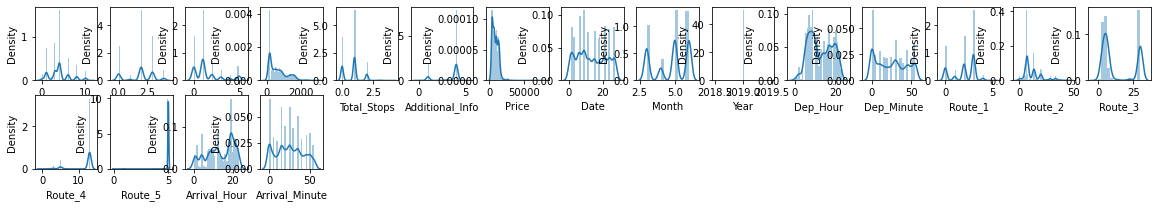

In [54]:
# snapshot of distribution curves of all input datas

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

Airline               AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Source             AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Destination        AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
Duration           AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Total_Stops        AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
Additional_Info    AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
Price              AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
Dep_Hour           AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
Dep_Minute            AxesSubplot(0.125,0.593621;0.0824468x0.130172)
Route_1            AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
Route_2            AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
Route_3            AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
Route_4            AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
Route_5            AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
Arrival_Hour       AxesSubplot(0.7

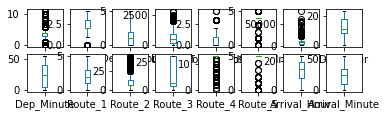

In [55]:
df.plot(kind='box',subplots=True,layout=(5,8))

In [56]:
df.describe()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Arrival_Hour,Arrival_Minute
count,13354.000000,13354.000000,13354.000000,13354.00000,13353.000000,13354.000000,10683.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,1.954096,1.435450,642.42287,0.826032,3.420099,9087.064121,12.513254,24.507264,2.015651,11.901677,13.519021,11.791149,4.982852,13.396061,24.664146
std,2.363997,1.178607,1.473368,506.71504,0.674632,1.163849,4611.359167,5.736273,18.832385,1.205399,7.987999,11.744642,2.951447,0.266600,6.896145,16.559723
min,0.000000,0.000000,0.000000,5.00000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,175.00000,0.000000,4.000000,5277.000000,8.000000,5.000000,1.000000,7.000000,4.000000,13.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,520.00000,1.000000,4.000000,8372.000000,11.000000,25.000000,2.000000,7.000000,6.000000,13.000000,5.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,930.00000,1.000000,4.000000,12373.000000,18.000000,40.000000,3.000000,14.000000,30.000000,13.000000,5.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,2860.00000,4.000000,5.000000,79512.000000,23.000000,55.000000,5.000000,45.000000,30.000000,13.000000,5.000000,23.000000,55.000000


In [57]:
cor=df.corr()

In [58]:
cor

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Arrival_Hour,Arrival_Minute
Airline,1.000000,-0.018547,0.022130,-0.163077,-0.206339,-0.065529,-0.039520,-0.026127,-0.057826,0.030980,-0.065699,0.064746,0.269561,0.057245,-0.007831,-0.074001
Source,-0.018547,1.000000,-0.589710,0.159344,0.191144,-0.040045,0.015998,0.058471,-0.058563,0.439608,0.038506,-0.267371,-0.076944,-0.009894,0.020766,0.015057
Destination,0.022130,-0.589710,1.000000,-0.254933,-0.294179,0.053199,-0.071112,-0.068252,0.133008,-0.491042,0.078221,0.407222,0.132684,0.011958,-0.032645,0.021234
Duration,-0.163077,0.159344,-0.254933,1.000000,0.736922,-0.165524,0.506371,-0.002450,-0.010339,0.291550,0.033531,-0.653939,-0.482102,-0.113809,0.050745,-0.070478
Total_Stops,-0.206339,0.191144,-0.294179,0.736922,1.000000,-0.073466,0.603897,-0.070698,-0.000137,0.431277,0.159726,-0.802624,-0.728879,-0.208133,0.037167,-0.108234
Additional_Info,-0.065529,-0.040045,0.053199,-0.165524,-0.073466,1.000000,-0.021576,-0.060747,-0.006170,-0.000256,0.083765,0.164743,-0.048320,-0.032293,0.024709,0.041807
Price,-0.039520,0.015998,-0.071112,0.506371,0.603897,-0.021576,1.000000,0.006819,-0.024492,0.182035,-0.087304,-0.592601,-0.316937,-0.055643,0.024264,-0.086155
Dep_Hour,-0.026127,0.058471,-0.068252,-0.002450,-0.070698,-0.060747,0.006819,1.000000,-0.026674,-0.053160,-0.131368,0.024214,0.052972,0.050172,0.004296,0.067645
Dep_Minute,-0.057826,-0.058563,0.133008,-0.010339,-0.000137,-0.006170,-0.024492,-0.026674,1.000000,-0.071529,0.091659,0.048903,-0.045230,0.003910,0.043967,-0.018133
Route_1,0.030980,0.439608,-0.491042,0.291550,0.431277,-0.000256,0.182035,-0.053160,-0.071529,1.000000,-0.080868,-0.480990,-0.197079,-0.015011,0.013354,-0.181473


<AxesSubplot:>

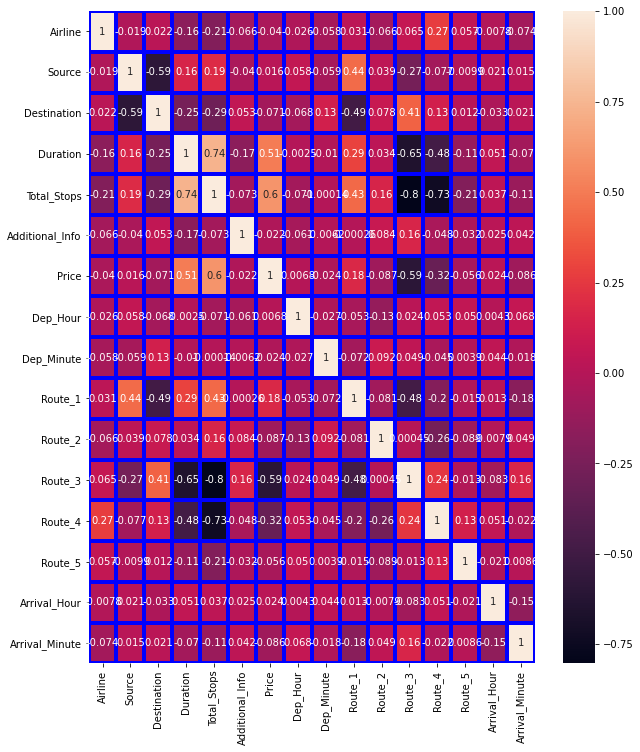

In [59]:
plt.figure(figsize=(10,12))
sn.heatmap(cor,annot=True,linewidth=3,linecolor='blue')

In [60]:
# price is highly corelated with duration and total stops

In [61]:
df['Price']=df['Price'].fillna(0)

In [62]:
df.skew()

Airline             0.720924
Source             -0.424151
Destination         1.247893
Duration            0.867883
Total_Stops         0.317844
Additional_Info    -1.573350
Price               0.980320
Date                0.135142
Month              -0.390684
Year                0.000000
Dep_Hour            0.109087
Dep_Minute          0.159397
Route_1            -0.618133
Route_2             1.426787
Route_3             0.636124
Route_4            -2.084009
Route_5           -15.985555
Arrival_Hour       -0.384591
Arrival_Minute      0.111711
dtype: float64

In [81]:
# to correct nan,infinity values

df=df[~df.isin([np.nan,np.inf,-np.inf]).any(1)]

In [82]:
# to standardise the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Price',axis=1))
x=scaled_df
y=df['Price']

In [83]:
x

array([[-0.41343816, -1.65796742,  2.41930713, ...,  0.06432745,
        -1.79760986, -0.88552935],
       [-1.25951323,  0.88740938, -0.97428996, ...,  0.06432745,
        -0.05748086, -0.58359193],
       [ 0.00959937,  0.03895045, -0.29557054, ...,  0.06432745,
        -1.36257761,  0.02028292],
       ...,
       [ 0.00959937,  0.03895045, -0.29557054, ...,  0.06432745,
        -1.36257761,  0.02028292],
       [-1.25951323,  0.03895045, -0.29557054, ...,  0.06432745,
         0.81258364, -0.58359193],
       [ 0.85567443,  0.03895045, -0.29557054, ...,  0.06432745,
         0.81258364, -0.58359193]])

In [84]:
y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
2666        0.0
2667        0.0
2668        0.0
2669        0.0
2670        0.0
Name: Price, Length: 13353, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [99]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9347, 18), (4006, 18), (9347,), (4006,))

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,random_state=1)
print("size of training set:{},size of validation set:{},size of test set:"
      "{}\n".format(x_train.shape,x_valid.shape,x_test.shape))

size of training set:(7510, 18),size of validation set:(2504, 18),size of test set:(3339, 18)



In [101]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [102]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 3587.9233727864375
MSE: 22917436.10382745
RMSE: 4787.215903197542


In [103]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [104]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 3715.8135669362086
MSE: 39385998.00771189
RMSE: 6275.826480051204


In [105]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [106]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 3247.8862444344613
MSE: 23044410.777540702
RMSE: 4800.459434006364


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [108]:
rdr=RandomForestRegressor(criterion='mae',max_features="sqrt")
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rfc=rdrscore.mean()
print('cross val score:',rfc*100)

R2 Score: 24.778553545618955
cross val score: 38.824930259089676


In [131]:
#Method-2

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [110]:
lm=LinearRegression()

In [111]:
lm.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [112]:
lm.coef_

array([ 2.22547238e+02, -1.93154781e+02,  4.41992105e+02,  3.93609322e+02,
        1.16139017e+03,  2.40268177e+02, -3.88129948e+02, -3.04431477e+02,
       -3.97903932e-13,  9.78563144e+01, -8.57608137e+01, -2.92037970e+02,
       -6.32485694e+02, -1.39543858e+03, -1.41363019e+02,  4.26228279e+01,
       -1.33612072e+02, -1.76211110e+01])

In [113]:
lm.intercept_

7240.559109989294

In [114]:
pred=lm.predict(x_test)
print("Flight Price:",pred)
print("Price",y_test)

Flight Price: [7092.35598358 7399.33628006 3436.38204288 ... 8315.60650877 4567.07542691
 8651.04187318]
Price 309          0.0
549      11096.0
1631      7229.0
6625      5224.0
7256     15764.0
          ...   
5141     10178.0
1611         0.0
10203    10262.0
559          0.0
1031         0.0
Name: Price, Length: 4006, dtype: float64


In [115]:
print('error:')

print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 3563.3060418012765
mean squared error: 23856316.721714593
root mean squared error: 4884.292857898121


In [116]:
from sklearn.metrics import r2_score

In [117]:
print(r2_score(y_test,pred))

0.21180876690182193


In [118]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.21857076420277988
At random state 0,the testing accuracy is:-0.20911279460560006


At random state 1,the training accuracy is:-0.22170982597644007
At random state 1,the testing accuracy is:-0.19592571338124842


At random state 2,the training accuracy is:-0.21288676375929516
At random state 2,the testing accuracy is:-0.2314351903616455


At random state 3,the training accuracy is:-0.21396127562496248
At random state 3,the testing accuracy is:-0.22904707730708673


At random state 4,the training accuracy is:-0.21588349359462067
At random state 4,the testing accuracy is:-0.22127297427813764


At random state 5,the training accuracy is:-0.22515540389592548
At random state 5,the testing accuracy is:-0.1881662864581236


At random state 6,the training accuracy is:-0.22107392864709574
At random state 6,the testing accuracy is:-0.200328154713854


At random state 7,the training accuracy is:-0.21542780720858523
At random state 7,the testing accurac

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=54)

In [120]:
lm.fit(x_train,y_train)

LinearRegression()

In [121]:
pred_test=lm.predict(x_test)

In [122]:
print(r2_score(y_test,pred_test))

0.22546150505989038


In [123]:
from sklearn.linear_model import Lasso,Ridge

In [142]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.21228780085608534

In [124]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.2122878008577226

In [125]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.2122877970754008


array([ 234.24069244, -136.08303583,  376.55078258,  356.32410747,
       1642.94191411,  173.3362685 , -409.01051612, -338.9178234 ,
          0.        ,   92.07330315, -117.74978163, -207.87210391,
       -567.78051697, -954.64613326,  115.18529623,  123.4777313 ,
        -85.38137195,    6.13675376])

In [126]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [127]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [128]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [129]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.183427463604517
0.03178410785913688
0.031841631451823504


In [130]:
#Regularization

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [150]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [151]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.22510821649656432

In [152]:
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [153]:
rd=Ridge(alpha=10,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
rdd=r2_score(y_test,pred_rd)
rdd

0.2254583037299568

In [154]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.1696310398569848

In [155]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.1711321346976704

In [132]:
# Saving The Model

import joblib
joblib.dump(rfc,"flightpriceprediction.pkl")

['flightpriceprediction.pkl']

# Conclusion- RandomForestRegressor is more accurate model for price prediction